# <center><font size=6> HW1: Perceptron and Shallow Network</font></center>
<center><font size=3><i>By Jiye Lyu and Binghao Li</i></font></center>  
<center><font size=3><i>04/10/2021</i></font></center>

---

# Problem 1 (20 points)

An online rental video company is interested in creating a model to make movie recommendations to one of its customers, Ms. X. As a consultant to this company, you are provided with the history of the movies that she accepted or rejected to watch. She makes her selections solely based on the movie’s level of violence and critic ratings. The data is in movieData.csv on Canvas.  


In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("movieData.csv")

## Train a perceptron that will create a linear boundary decision that will help the company to make future recommendations to Ms. X. After how many iterations does the algorithm converge?

In [3]:
X = data.iloc[:,0:2]

In [4]:
constant_w0 = np.repeat(np.arange(1,2),len(X))

In [5]:
X = pd.concat([pd.Series(constant_w0, index=X.index, name='Constant'), X], axis=1)

In [6]:
Y = data.iloc[:,2]

In [7]:
X = np.array(X)

In [8]:
Y = np.array(Y)

In [9]:
data.head()

,LevelOfViolence,CriticsRating,Watched
0,1,1.2,-1
1,1,3.5,1
2,1,4.2,1
3,2,3.9,1
4,2,2.8,-1


In [10]:
Y

array([-1,  1,  1,  1, -1, -1, -1, -1, -1,  1,  1, -1, -1], dtype=int64)

In [11]:
w = [0,0,0]
incorrect_times = 0

for i in range(len(X)):
    label = np.dot(w,X[i])
    if(np.sign(label)!=Y[i]):
        w = w + Y[i]*X[i]
        incorrect_times = incorrect_times + 1
    else:
        continue

In [12]:
count = 1
while(incorrect_times!=0):
    count+=1
    incorrect_times = 0
    for i in range(len(X)):
        label = np.dot(w,X[i])
        if(np.sign(label)!=Y[i]):
            w = w + Y[i]*X[i]
            incorrect_times = incorrect_times + 1

In [13]:
w

array([-32. ,  -9. ,  15.9])

In [14]:
print(" The algorithm converges",count,"iterations")

 The algorithm converges 44 iterations


## Upon creating a model, plot the boundary line along with all the data points and axes clearly marked.


In [15]:
x11 = 1
x12 = 5

In [16]:
x21 = (-w[0] - w[1]*x11)/w[2]
x22 = (-w[0] - w[1]*x12)/w[2]

In [17]:
X1 = (x11,x12)
X2 = (x21,x22)

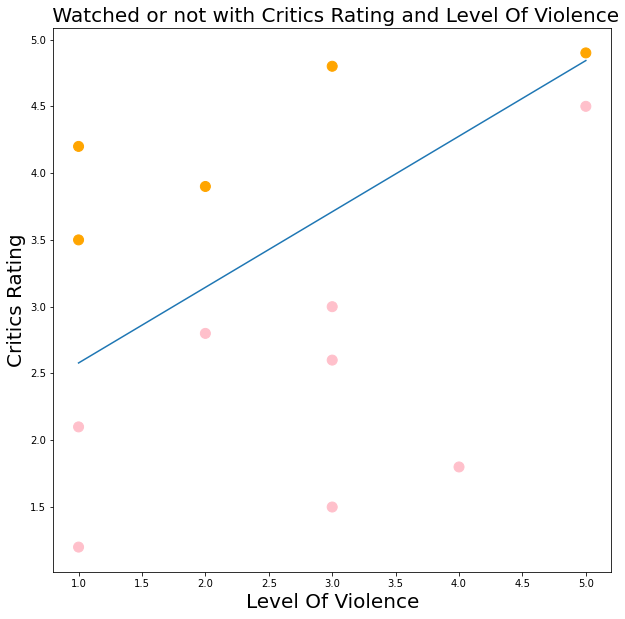

In [18]:
import matplotlib.mlab as mlab  
import matplotlib.pyplot as plt  
import seaborn as sns

fig = plt.figure(figsize=(10,10))

colormap = np.array([ 'red', 'orange', 'green', 'yellow','pink'])
plt.ylabel("Critics Rating",fontsize=20)
plt.xlabel("Level Of Violence",fontsize=20)
plt.title(" Watched or not with Critics Rating and Level Of Violence",fontsize = 20)
plt.scatter(x = data.LevelOfViolence, y = data.CriticsRating, c = colormap[data.Watched], s = 100)
plt.plot(X1,X2)
plt.show()

# Problem 2 (40 points)

In this problem you will use the data in siCoData.csv file to train a neural network. Use the backpropagation algorithm to train a 3-layer (input, hidden, output) neural network. Use stochastic gradient decent (SGD) technique and assume that the activation function for the hidden layer and output layer are tanh and linear, respectively. (You must write your own code for BP and SGD).



## Report the minimum Ein with the related weights and number of iterations.

The stopping criteria for training in this problem should be a combination of achieving a minimum in-sample error $Ein = 1/n sum{1,N,en}$ and reaching a maximum number of epochs (In this expression N is the number of observations in the data set and en is the error corresponding to each individual training point). 


In [19]:
data2 = pd.read_csv("siCoData.csv")

In [20]:
constant_for_w0 = np.repeat(np.arange(1,2),len(data2))

In [21]:
X = data2.iloc[:,0:1]

In [22]:
X = pd.concat([pd.Series(constant_for_w0, index = X.index, name='Constant'), X], axis=1)
Y = data2.iloc[:,1]
X = np.array(X)
Y = np.array(Y)

In [23]:
def tanh(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

The number of neurons should less than **(N/10 - 1) / d + 2**


So after 7 times attempts, we choose 3 neurons.

In [24]:
h = 3

In [25]:
np.random.seed(123)
w1 = np.random.uniform(-1,1,size=(2,h))
np.random.seed(123)
w2 = np.random.uniform(-1,1,size=(h+1,1))

In [26]:
w1

array([[ 0.39293837, -0.42772133, -0.54629709],
       [ 0.10262954,  0.43893794, -0.15378708]])

In [27]:
w2

array([[ 0.39293837],
       [-0.42772133],
       [-0.54629709],
       [ 0.10262954]])

In [28]:
def Get_w1_w2(X,Y,w1,w2,step_length):
    for i in range(len(X)):
        x_point= X[i:i+1]
        y_point= Y[i:i+1]

        S1_i = np.dot(x_point,w1)
        thetaS1 = np.tanh(S1_i)
        thetaS1_and_constant = np.insert(thetaS1,0,1,axis=1)
        yhat = np.dot(thetaS1_and_constant,w2)

        E_w2 = 2 * (yhat - y_point) * thetaS1_and_constant
        E_w2.shape = (h+1,1)
        E_w1=2 * (yhat - y_point) * w2[1:h+1,:] * (1 - thetaS1**2).T * x_point
        E_w1.shape=(2,h)

        w1 = w1 - step_length * E_w1
        w2 = w2 - step_length * E_w2
        
    return w1,w2

In [29]:
def Get_Y_hat_list(X,Y,w1,w2):

    Y_hat_list = []
    for i in range(len(X)):
        x_point= X[i:i+1]
        y_point= Y[i:i+1]

        S1_i = np.dot(x_point,w1)
        thetaS1 = np.tanh(S1_i)
        thetaS1_and_constant = np.insert(thetaS1,0,1,axis=1)
        yhat = np.dot(thetaS1_and_constant,w2)
        
        Y_hat_list.append(yhat[0,0])

    return Y_hat_list
    

In [30]:
Ein_list = []
w1_list = []
w2_list = []
count = 0
for iterations in range(300):
    
    w1,w2 = Get_w1_w2(X,Y,w1,w2,0.01)
    w1_list.append(w1)
    w2_list.append(w2)
    
    Y_hat_list = []
    Y_hat_list = Get_Y_hat_list(X,Y,w1,w2)
    
    Ein = (Y - np.array(Y_hat_list))**2    
    Ein_mean = sum(Ein)/len(Ein)

    Ein_list.append(Ein_mean)

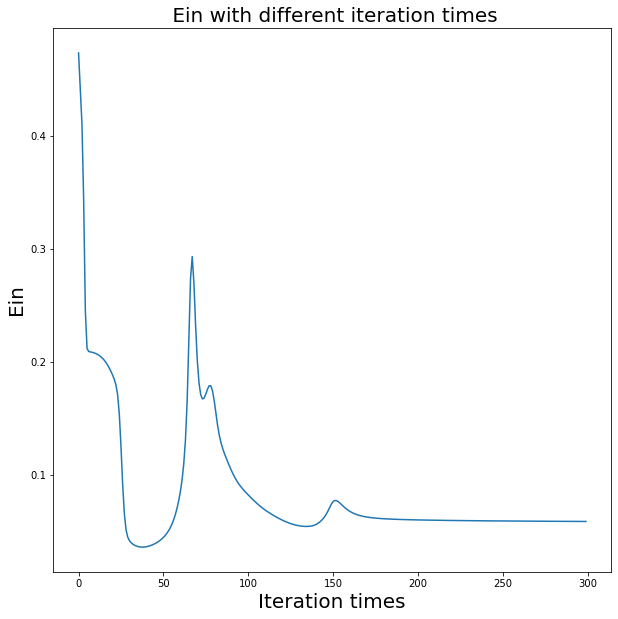

In [31]:
fig = plt.figure(figsize=(10,10))
plt.ylabel("Ein",fontsize=20)
plt.xlabel("Iteration times",fontsize=20)
plt.title(" Ein with different iteration times",fontsize = 20)
plt.plot(Ein_list)
plt.show()

In [32]:
Ein_minimum = min(Ein_list)
Minimun_index = np.argmin(Ein_list)
Ein_minimum_w1 = w1_list[Minimun_index]
Ein_minimum_w2 = w2_list[Minimun_index]

print('The minimum Ein is ',Ein_minimum)
print('The iteration time is ',Minimun_index)
print('W1 in this time is ',Ein_minimum_w1)
print('W2 in this time is ',Ein_minimum_w2)

The minimum Ein is  0.03579285679450524
The iteration time is  38
W1 in this time is  [[ 0.26330661 -5.6929197  -0.2265118 ]
 [ 0.139549    7.71934891  2.78682787]]
W2 in this time is  [[ 0.04450272]
 [-1.21444524]
 [-0.46897249]
 [ 1.13469266]]


## Graph the original data (y vs. x) and the predicted values (ˆy vs. x) on two separate scatter plots.

<function matplotlib.pyplot.show(close=None, block=None)>

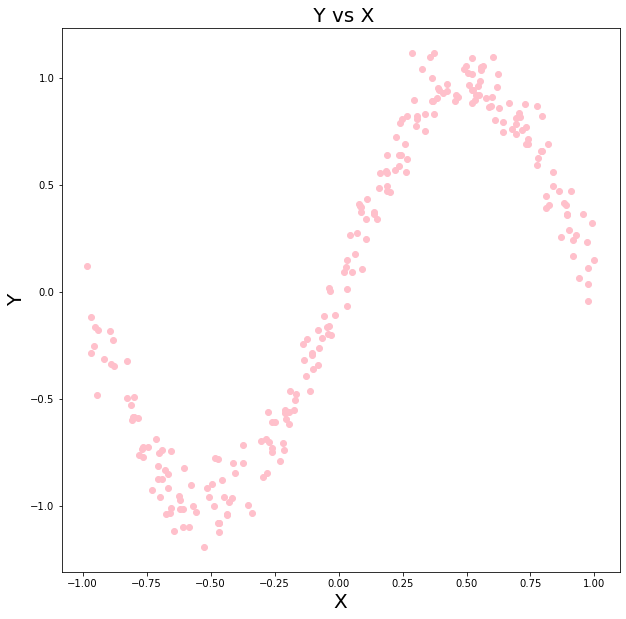

In [33]:
Xlabel = data2['x']
Ylabel = data2['y']
fig = plt.figure(figsize=(10,10))
plt.ylabel("Y",fontsize=20)
plt.xlabel("X",fontsize=20)
plt.title(" Y vs X",fontsize = 20)
plt.plot(Xlabel,Ylabel,'o',c='pink')
plt.show

In [34]:
S1_best = np.dot(X,Ein_minimum_w1)
thetaS1 = np.tanh(S1_best)
thetaS1_and_constant = np.insert(thetaS1,0,1,axis=1)
yhat = np.dot(thetaS1_and_constant,Ein_minimum_w2)

<function matplotlib.pyplot.show(close=None, block=None)>

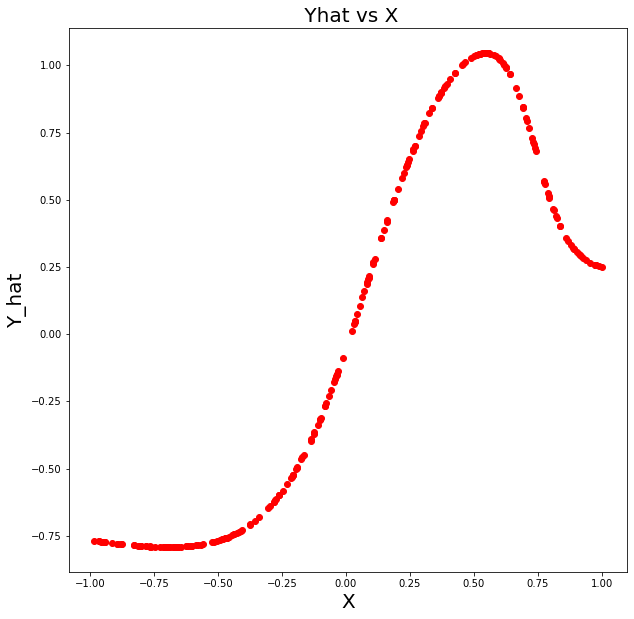

In [35]:
fig = plt.figure(figsize=(10,10))
plt.ylabel("Y_hat",fontsize=20)
plt.xlabel("X",fontsize=20)
plt.title(" Yhat vs X",fontsize = 20)
plt.plot(Xlabel,yhat,'o',c='red')
plt.show